In [1]:
# Library
import pandas as pd
import numpy as np

# # Google Colab
# from google.colab import files

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# EDA Libraries
from skrub import TableReport

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
# uploaded = files.upload()
path = "hotel_bookings.csv"
df = pd.read_csv(path)

In [3]:
# General table report
report = TableReport(df, max_plot_columns=32, max_association_columns=32)
report

Processing column  32 / 32


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [4]:
# Create seen & unseen dataframes

data_seen, data_unseen = train_test_split(df, test_size=0.2,
                                          random_state=42,
                                          stratify=df["is_canceled"]) # stratify digunakan untuk menjaga proporsi target antara data seen dan data unseen
                                                                    # stratify khusus classification

data_seen.to_csv("data_train.csv", index=False)
data_unseen.to_csv("data_test.csv", index=False)

In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[1, 0]"
2,lead_time,int64,0,0.00,479,"[476, 254]"
3,arrival_date_year,int64,0,0.00,3,"[2015, 2017]"
4,arrival_date_month,object,0,0.00,12,"[August, July]"
5,arrival_date_week_number,int64,0,0.00,53,"[5, 7]"
6,arrival_date_day_of_month,int64,0,0.00,31,"[4, 25]"
7,stays_in_weekend_nights,int64,0,0.00,17,"[19, 18]"
8,stays_in_week_nights,int64,0,0.00,35,"[21, 30]"
9,adults,int64,0,0.00,14,"[10, 50]"


In [6]:
# Handling Missing Values in hotel_bookings.csv

# Fill missing values using dictionary format
df.fillna({
    'children': 0,
    'country': 'Unknown',
    'agent': 0,
    'company': 0
}, inplace=True)

# Convert agent & company to integer for consistency
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)

In [7]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.0,2,"[City Hotel, Resort Hotel]"
1,is_canceled,int64,0,0.0,2,"[1, 0]"
2,lead_time,int64,0,0.0,479,"[118, 451]"
3,arrival_date_year,int64,0,0.0,3,"[2017, 2016]"
4,arrival_date_month,object,0,0.0,12,"[February, July]"
5,arrival_date_week_number,int64,0,0.0,53,"[28, 19]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[1, 12]"
7,stays_in_weekend_nights,int64,0,0.0,17,"[4, 6]"
8,stays_in_week_nights,int64,0,0.0,35,"[5, 17]"
9,adults,int64,0,0.0,14,"[0, 50]"


In [9]:
# Exact Duplicate
if df.duplicated().any():
    print("Duplicate rows found.")
    print("Total duplicate rows:", df.duplicated().sum())
    print("Persentase Duplicate Row", round((df.duplicated().sum()/len(df))*100,2),"%")
    duplicated_row = df[df.duplicated(keep=False)]
else:
    print("No duplicate rows found.")

Duplicate rows found.
Total duplicate rows: 31994
Persentase Duplicate Row 26.8 %


In [10]:
# Remove exact duplicates
df = df.drop_duplicates().reset_index(drop=True)

# Recheck exact duplicates
if df.duplicated().any():
    print("Duplicate rows found.")
    print("Total duplicate rows:", df.duplicated().sum())
    print("Persentase Duplicate Row", round((df.duplicated().sum()/len(df))*100,2),"%")
    duplicated_row = df[df.duplicated(keep=False)]
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [11]:
# Dropping reservation_status & reservation_status_date

df.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)

In [14]:
# Dropping reservation_status & reservation_status_date

df.drop(columns=['arrival_date_week_number'], inplace=True)

In [16]:
# mengubah data adr yang dibawah 0 menjadi 0
df.loc[df['adr'] < 0, 'adr'] = 0

In [18]:
df[df['adr'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0
122,Resort Hotel,0,32,2015,July,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0,0,0,Transient,0.0,0,1
163,Resort Hotel,0,111,2015,July,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240,0,0,Transient,0.0,0,2
164,Resort Hotel,0,0,2015,July,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250,0,0,Transient,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86812,City Hotel,0,78,2017,August,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98,0,0,Transient-Party,0.0,0,0
86931,City Hotel,0,1,2017,August,24,0,1,2,1.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,1,No Deposit,0,0,0,Transient,0.0,0,3
87073,City Hotel,0,1,2017,August,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,0,0,Transient,0.0,0,0
87184,City Hotel,0,518,2017,August,26,2,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,229,0,0,Transient-Party,0.0,0,0


In [17]:
# Rechecking the table report
report = TableReport(df, max_plot_columns=32, max_association_columns=32)
report

Processing column  29 / 29


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [22]:
display(df[df['stays_in_week_nights'] > 5])
display(df[df['stays_in_weekend_nights'] > 2])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
28,Resort Hotel,0,118,2015,July,1,4,10,1,0.0,0,BB,Unknown,Direct,Direct,0,0,0,A,A,2,No Deposit,0,0,0,Transient,62.00,0,2
29,Resort Hotel,0,95,2015,July,1,4,11,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,241,0,0,Transient,63.86,0,0
30,Resort Hotel,1,96,2015,July,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0,0,0,Transient,108.30,0,2
48,Resort Hotel,0,93,2015,July,2,3,8,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,156,0,0,Contract,56.01,0,0
49,Resort Hotel,0,76,2015,July,2,4,10,2,0.0,0,BB,OMN,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,243,0,0,Contract,110.70,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87281,City Hotel,0,190,2017,August,23,2,7,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,85,0,0,Transient,80.10,0,1
87285,City Hotel,0,292,2017,August,20,4,8,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,128.10,0,2
87308,City Hotel,0,75,2017,August,23,2,8,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,81.00,0,0
87376,City Hotel,0,207,2017,August,25,3,7,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,A,0,No Deposit,14,0,0,Transient,96.25,0,2


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
28,Resort Hotel,0,118,2015,July,1,4,10,1,0.0,0,BB,Unknown,Direct,Direct,0,0,0,A,A,2,No Deposit,0,0,0,Transient,62.00,0,2
29,Resort Hotel,0,95,2015,July,1,4,11,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,241,0,0,Transient,63.86,0,0
48,Resort Hotel,0,93,2015,July,2,3,8,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,156,0,0,Contract,56.01,0,0
49,Resort Hotel,0,76,2015,July,2,4,10,2,0.0,0,BB,OMN,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,243,0,0,Contract,110.70,0,0
78,Resort Hotel,1,368,2015,July,3,3,7,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,40,0,0,Contract,55.68,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87084,City Hotel,0,218,2017,August,18,3,7,2,2.0,0,HB,BEL,Direct,Direct,0,0,0,E,E,2,No Deposit,14,0,0,Transient,215.86,0,1
87175,City Hotel,0,195,2017,August,17,4,8,2,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,118.43,0,1
87285,City Hotel,0,292,2017,August,20,4,8,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,128.10,0,2
87372,City Hotel,0,54,2017,August,27,3,5,1,0.0,0,BB,JPN,Direct,Direct,0,0,0,G,G,0,No Deposit,14,0,0,Transient,266.75,0,1


array([[<Axes: title={'center': 'is_canceled'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_date_year'}>,
        <Axes: title={'center': 'arrival_date_day_of_month'}>],
       [<Axes: title={'center': 'stays_in_weekend_nights'}>,
        <Axes: title={'center': 'stays_in_week_nights'}>,
        <Axes: title={'center': 'adults'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'is_repeated_guest'}>,
        <Axes: title={'center': 'previous_cancellations'}>,
        <Axes: title={'center': 'previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'booking_changes'}>,
        <Axes: title={'center': 'agent'}>,
        <Axes: title={'center': 'company'}>,
        <Axes: title={'center': 'days_in_waiting_list'}>],
       [<Axes: title={'center': 'adr'}>,
        <Axes: title={'center': 'required_car_parking_spaces'}>,
        <Axes: title={'center': 'total_of

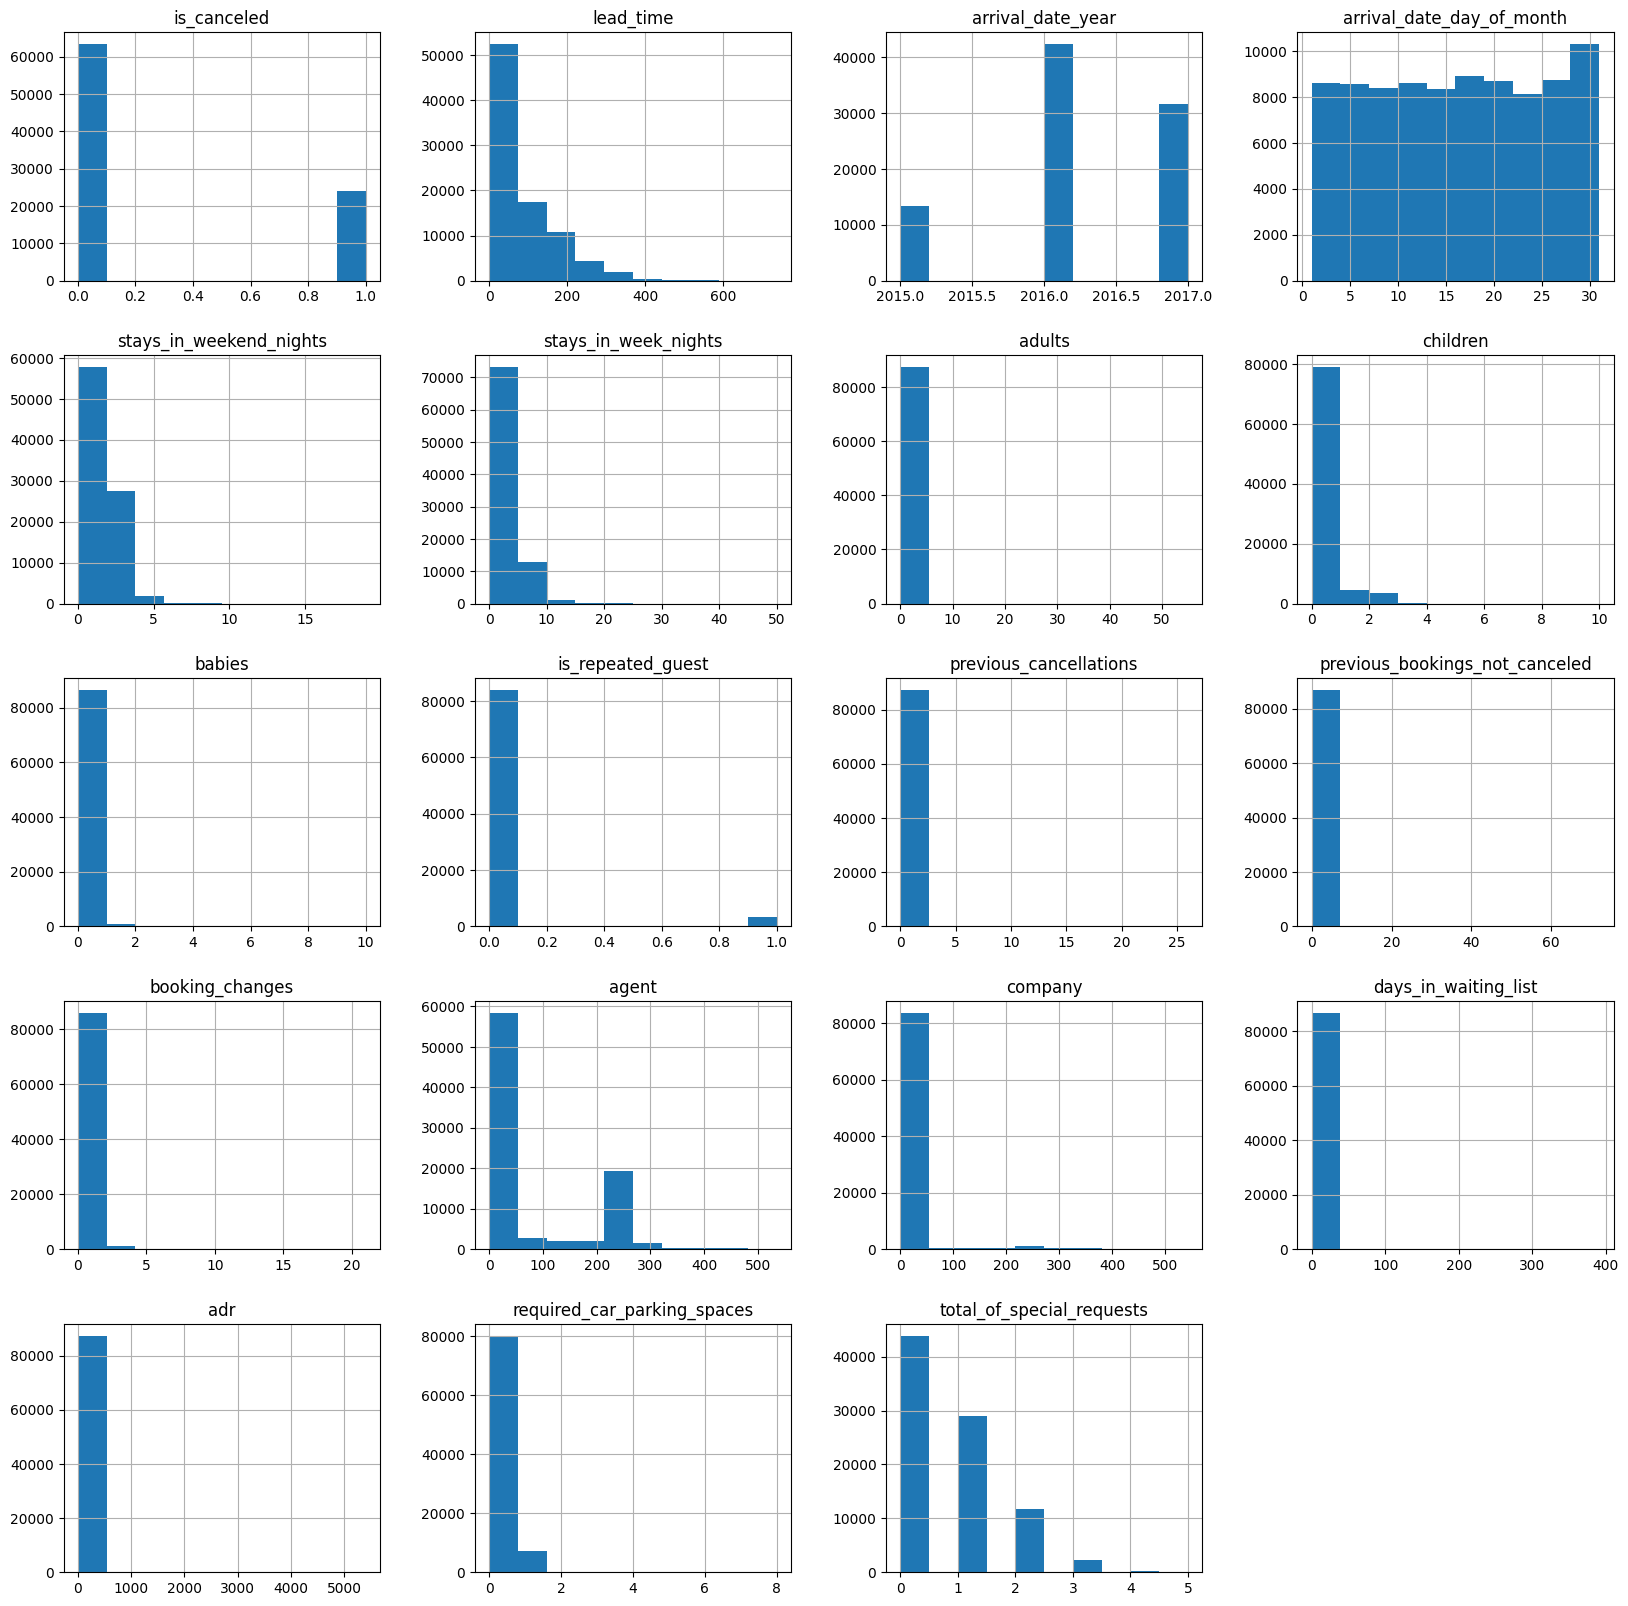

In [20]:
# buat histogram untuk sebaran data
df.hist(figsize=(20,20))

# Data Preperations

In [24]:
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_day_of_month       87396 non-null  int64  
 6   stays_in_weekend_nights         87396 non-null  int64  
 7   stays_in_week_nights            87396 non-null  int64  
 8   adults                          87396 non-null  int64  
 9   children                        87396 non-null  float64
 10  babies                          87396 non-null  int64  
 11  meal                            87396 non-null  object 
 12  country                         

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1


None

Now let’s perform feature encoding for the categorical features in our dataset.  
Here is the plan:

1. Transform the column `arrival_date_month` using **Ordinal Encoding**, since months have a clear natural order from January to December.

2. Transform the columns `hotel`, `meal`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, and `customer_type` using **One Hot Encoding**, because they are categorical nominal features (no natural order) with a relatively small number of unique values.

3. Transform the column `country` using **Binary Encoding**, because it contains a very large number of unique values (150+ countries). Using One Hot Encoding would create too many new columns, while Binary Encoding keeps the dimensionality low but still preserves information.

4. Transform the columns `agent` and `company` using **Label Encoding**. Both of these are just IDs (travel agent ID and company ID), so Label Encoding is the most efficient way to handle them without inflating dimensionality.

5. For the column `deposit_type`, we also apply **One Hot Encoding**, since it only contains three categories (`No Deposit`, `Non Refund`, `Refundable`) and does not have a natural order.

> Note: We need to be cautious, as some encoding techniques may increase the number of features significantly. The above strategy balances interpretability and computational efficiency.
